<a href="https://colab.research.google.com/github/fintechutcc/mof-training/blob/main/mof-training-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

## ตัวอย่างที่ 1

ข้อมูลต่อไปนี้เป็นข้อมูลจำลองซึ่งเป็นตัวอย่างของข้อมูลที่ไม่สามารถแบ่งได้ด้วยเส้นตรง ข้อมูลมี 2 คลาส เมื่อพล็อตแทนด้วยสามเหลี่ยมกับวงกลม

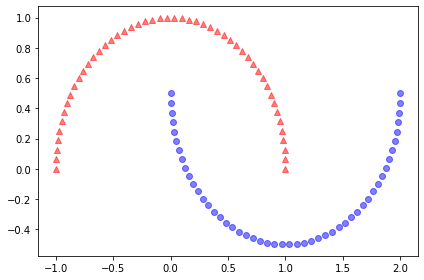

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

โค้ดต่อไปนี้เป็นการใช้ PCA ในการแปลงข้อมูล แล้วนำมา Principle Component 1 กับ 2 มาพล็อต เห็นได้ว่า PCA ยังไม่สามารถแยกข้อมูลออกจากกันได้ถึงแม้จะถูกแปลงแล้ว

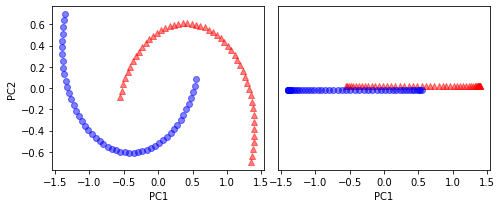

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_pca[y==0, 0], X_pca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1, 0], X_pca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

## Kernel PCA

ต่อไปนี้เป็นการใช้ Kernel PCA ในการแปลงข้อมูล สังเกตว่า ผลลัพธ์ของการแปลงทำให้สามารถแบ่งข้อมูลทั้ง 2 คลาสออกจากกันแบบเชิงเส้นได้

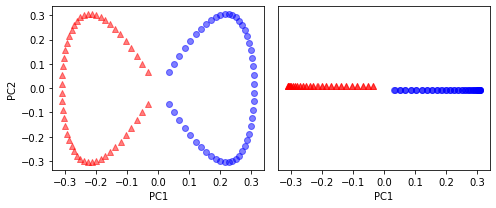

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(gamma=30, kernel="rbf")
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

## ตัวอย่างที่ 2

ข้อมูลต่อไปนี้เป็นตัวอย่างข้อมูล 2 คลาสอยู่ในลักษณะวงกลมซ้อนกันดังรูปด้านล่าง

In [ ]:
from sklearn.datasets import make_circles

Xc, yc = make_circles(n_samples=1000,
                    random_state=123, noise=0.1,
                    factor=0.2)
plt.scatter(Xc[yc == 0, 0], Xc[yc == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(Xc[yc == 1, 0], Xc[yc == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: ignored

เมื่อใช้ PCA แล้วนำ PC1 และ PC2 มาพล็อต ทำให้เห็นว่า ไม่สามารถแยกข้อมูลแบบเชิงเส้นได้ เหมือนเช่นดังตัวอย่างที่แล้ว

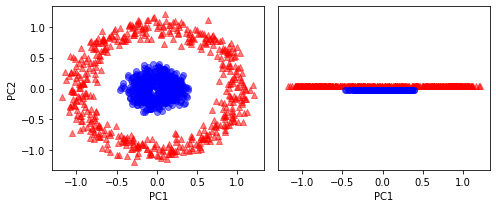

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
Xc_pca = pca.fit_transform(Xc)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(Xc_pca[yc==0, 0], Xc_pca[yc==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(Xc_pca[yc==1, 0], Xc_pca[yc==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(Xc_pca[yc==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(Xc_pca[yc==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

ทดสอบการใช้ Kernel PCA โดย kernel คือ RBF สังเกตผลลัพธ์ของ PC1 และ PC2 ที่ได้

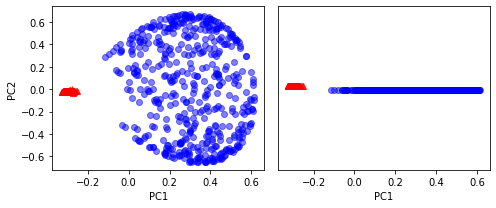

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(gamma=10, kernel="rbf")
Xc_kpca = kpca.fit_transform(Xc)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(Xc_kpca[yc==0, 0], Xc_kpca[yc==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(Xc_kpca[yc==1, 0], Xc_kpca[yc==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(Xc_kpca[yc==0, 0], np.zeros((500,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(Xc_kpca[yc==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()